In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import glob
import random
import os
from matplotlib.patches import Rectangle
from lxml import etree
from sklearn.preprocessing import LabelBinarizer
# Enable Matplotlib backend for displaying static images
%matplotlib inline

In [2]:
# Subfolders for the class labels
os.listdir("data/images/images")

['crease',
 'crescent_gap',
 'inclusion',
 'oil_spot',
 'punching_hole',
 'rolled_pit',
 'silk_spot',
 'waist folding',
 'water_spot',
 'welding_line']

In [3]:
# Annotations of the class labels
os.listdir("data/label/label")[:5]

['img_01_3402617700_00001.xml',
 'img_01_3402617700_01009.xml',
 'img_01_3436789500_00004.xml',
 'img_01_3436814600_00259.xml',
 'img_01_3436815300_00473.xml']

In [4]:
# Read all the images and count the number of image paths in the training subfolders
image_path = glob.glob("data/images/images/*/*.jpg")
# Normalize slashes to one format first
image_path = [p.replace('\\', '/') for p in image_path]

In [5]:
len(image_path)

2306

In [6]:
# Read all the annotation files and count the number of annotations in the training label folder
xmls_path = glob.glob("data/label/label/*.xml")
# Normalize slashes to one format first
xmls_path = [p.replace('\\', '/') for p in xmls_path]

In [7]:
len(xmls_path)

2280

In [8]:
xmls_path[:5]

['data/label/label/img_01_3402617700_00001.xml',
 'data/label/label/img_01_3402617700_01009.xml',
 'data/label/label/img_01_3436789500_00004.xml',
 'data/label/label/img_01_3436814600_00259.xml',
 'data/label/label/img_01_3436815300_00473.xml']

In [9]:
# Sort the annotation and image files in ascending order
# The filenames are identical except for the extension.  This allows for a correct mapping of image to annotation by index.
xmls_path.sort(key = lambda x:x.split("/")[-1].split(".xml")[0])
image_path.sort(key = lambda x:x.split("/")[-1].split(".jpg")[0])

In [10]:
xmls_path[:5]

['data/label/label/img_01_3402617700_00001.xml',
 'data/label/label/img_01_3402617700_01009.xml',
 'data/label/label/img_01_3436789500_00004.xml',
 'data/label/label/img_01_3436814600_00259.xml',
 'data/label/label/img_01_3436815300_00473.xml']

In [11]:
image_path[:5]

['data/images/images/crescent_gap/img_01_3402617700_00001.jpg',
 'data/images/images/crescent_gap/img_01_3402617700_01009.jpg',
 'data/images/images/crease/img_01_3436789500_00004.jpg',
 'data/images/images/silk_spot/img_01_3436814600_00259.jpg',
 'data/images/images/silk_spot/img_01_3436815300_00473.jpg']

In [12]:
# Extract the annotation filename without extension
xmls_train = [path.split("/")[-1].split(".")[0] for path in xmls_path]

In [13]:
xmls_train[:5]

['img_01_3402617700_00001',
 'img_01_3402617700_01009',
 'img_01_3436789500_00004',
 'img_01_3436814600_00259',
 'img_01_3436815300_00473']

In [14]:
# Retrieve the image filename that have a corresponding annotation file. Not all images have annotations (defects)
# This will be the training set of images.
imgs_train = [img for img in image_path if (img.split("/")[-1].split)(".jpg")[0] in xmls_train]
imgs_train[:5]

['data/images/images/crescent_gap/img_01_3402617700_00001.jpg',
 'data/images/images/crescent_gap/img_01_3402617700_01009.jpg',
 'data/images/images/crease/img_01_3436789500_00004.jpg',
 'data/images/images/silk_spot/img_01_3436814600_00259.jpg',
 'data/images/images/silk_spot/img_01_3436815300_00473.jpg']

In [15]:
# Ensure equal counts of training images with the annotations
len(imgs_train),len(xmls_train)

(2280, 2280)

In [16]:
#########################
# SET UP THE DATA FRAME #
#########################

In [17]:
# Extract class label from the path of each image file
labels = [label.split("/")[-2] for label in imgs_train]
labels[:15]

['crescent_gap',
 'crescent_gap',
 'crease',
 'silk_spot',
 'silk_spot',
 'silk_spot',
 'silk_spot',
 'silk_spot',
 'crescent_gap',
 'crescent_gap',
 'crescent_gap',
 'crescent_gap',
 'crescent_gap',
 'crescent_gap',
 'crescent_gap']

In [18]:
# Convert the labels into a Pandas DataFrame for the class labels and call them Defect Types
dataFrame = pd.DataFrame(labels, columns = ["Defect Type"])
dataFrame

,Defect Type
0,crescent_gap
1,crescent_gap
2,crease
3,silk_spot
4,silk_spot
...,...
2275,silk_spot
2276,silk_spot
2277,silk_spot
2278,silk_spot


In [19]:
# Obtain training labels without duplication
Class = dataFrame["Defect Type"].unique()

In [20]:
print(Class)

['crescent_gap' 'crease' 'silk_spot' 'water_spot' 'welding_line'
 'inclusion' 'oil_spot' 'waist folding' 'rolled_pit' 'punching_hole']


In [21]:
# Pair each element in Class with a corresponding number starting from 1
zip_result = list(zip(Class, range(1, len(Class) + 1)))
print(zip_result)

[('crescent_gap', 1), ('crease', 2), ('silk_spot', 3), ('water_spot', 4), ('welding_line', 5), ('inclusion', 6), ('oil_spot', 7), ('waist folding', 8), ('rolled_pit', 9), ('punching_hole', 10)]


In [22]:
# Transform the tuple into a map of defect type to it's numerical reference (defect class index)
Class_dict = dict(zip_result)
Class_dict

{'crescent_gap': 1,
 'crease': 2,
 'silk_spot': 3,
 'water_spot': 4,
 'welding_line': 5,
 'inclusion': 6,
 'oil_spot': 7,
 'waist folding': 8,
 'rolled_pit': 9,
 'punching_hole': 10}

In [23]:
# Create a new column called "Class" in the data frome and store the corresponding defect index
dataFrame["Class"] = dataFrame["Defect Type"].apply(lambda x: Class_dict[x])
dataFrame

,Defect Type,Class
0,crescent_gap,1
1,crescent_gap,1
2,crease,2
3,silk_spot,3
4,silk_spot,3
...,...,...
2275,silk_spot,3
2276,silk_spot,3
2277,silk_spot,3
2278,silk_spot,3


In [24]:
# Convert the class dictionary into binary vectors for easier processing.
# Set up a One-hot encoding to represent the classification types.  A one-hot encoded vector is a way of representing categorical values as binary vectors
# where exactly one element is 1 (the "hot" one) and all others are 0.  Each  is assigned a binary vector of 10 with the bit for the
# specific defect type turned "on".
lb = LabelBinarizer()
# Fit it to the class dictionary
lb.fit(list(Class_dict.values()))
# Convert multi-class labels to binary labels (belong or does not belong) to the labels
binary_labels = lb.transform(dataFrame["Class"])
binary_labels[:5]

array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]])

In [25]:
binary_labels.shape

(2280, 10)

In [26]:
# Create some new columns corresponding to the class index
y_bin_labels = [] 
for i in range(binary_labels.shape[1]):
    y_bin_labels.append("Class" + str(i))
    # Add the columns to the data frame.
    dataFrame["Class" + str(i + 1)] = binary_labels[:, i]

In [27]:
y_bin_labels[:10]

['Class0',
 'Class1',
 'Class2',
 'Class3',
 'Class4',
 'Class5',
 'Class6',
 'Class7',
 'Class8',
 'Class9']

In [28]:
dataFrame

,Defect Type,Class,Class1,Class2,Class3,Class4,Class5,Class6,Class7,Class8,Class9,Class10
0,crescent_gap,1,1,0,0,0,0,0,0,0,0,0
1,crescent_gap,1,1,0,0,0,0,0,0,0,0,0
2,crease,2,0,1,0,0,0,0,0,0,0,0
3,silk_spot,3,0,0,1,0,0,0,0,0,0,0
4,silk_spot,3,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2275,silk_spot,3,0,0,1,0,0,0,0,0,0,0
2276,silk_spot,3,0,0,1,0,0,0,0,0,0,0
2277,silk_spot,3,0,0,1,0,0,0,0,0,0,0
2278,silk_spot,3,0,0,1,0,0,0,0,0,0,0


In [29]:
# Above you see the english name of the classification plus both the associated numeric (Class) and binary classfications.

In [30]:
# Drop the English and numerical classfication columns because the machine doesn't need them.
dataFrame.drop("Class", axis = 1, inplace = True)
dataFrame.drop("Defect Type", axis = 1, inplace = True)

In [31]:
# Display the current data frame
dataFrame

,Class1,Class2,Class3,Class4,Class5,Class6,Class7,Class8,Class9,Class10
0,1,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
2275,0,0,1,0,0,0,0,0,0,0
2276,0,0,1,0,0,0,0,0,0,0
2277,0,0,1,0,0,0,0,0,0,0
2278,0,0,1,0,0,0,0,0,0,0


In [32]:
# Function to parse and extract information from an annotation file and normalize bounding-box coordinates between 0,1
# Relative bounding box coordinates express positions and dimensions as fractions of the image size, making them resolution-independent.
def to_labels(path):
    # Read the annotation file
    xml = open("{}".format(path)).read()                         
    sel = etree.HTML(xml)
    # Obtain the image width
    width = int(sel.xpath("//size/width/text()")[0])
    # Obtain the image height
    height = int(sel.xpath("//size/height/text()")[0])  
    # Extract the bounding box coordinates
    xmin = int(sel.xpath("//bndbox/xmin/text()")[0])
    xmax = int(sel.xpath("//bndbox/xmax/text()")[0])
    ymin = int(sel.xpath("//bndbox/ymin/text()")[0])
    ymax = int(sel.xpath("//bndbox/ymax/text()")[0])
    # Return the relative coordinates
    return [xmin/width, ymin/height, xmax/width, ymax/height]

In [33]:
# Display the relative bounding box coordinates for the annotations
coords = [to_labels(path) for path in xmls_path]
coords[:5]

[[0.8486328125, 0.806, 0.951171875, 0.993],
 [0.857421875, 0.298, 0.96044921875, 0.858],
 [0.47900390625, 0.182, 0.9990234375, 0.249],
 [0.3642578125, 0.017, 0.49365234375, 0.993],
 [0.3974609375, 0.017, 0.7431640625, 0.978]]

In [34]:
# Transpose the coordinates and return lists for tuple element
# Keep in mind that the lists are sorted the same as both xmls_path and image_path
xmin, ymin, xmax, ymax = zip(*coords)

In [35]:
xmin[:5], ymin[:5], xmax[:5], ymax[:5]

((0.8486328125, 0.857421875, 0.47900390625, 0.3642578125, 0.3974609375),
 (0.806, 0.298, 0.182, 0.017, 0.017),
 (0.951171875, 0.96044921875, 0.9990234375, 0.49365234375, 0.7431640625),
 (0.993, 0.858, 0.249, 0.993, 0.978))

In [36]:
# Convert to Numpy array.  Including the data frame values
xmin = np.array(xmin)
ymin = np.array(ymin)
xmax = np.array(xmax)
ymax = np.array(ymax)
label_vector = np.array(dataFrame.values)

In [37]:
xmin[:5], ymin[:5], xmax[:5], ymax[:5], label_vector[:5]

(array([0.84863281, 0.85742188, 0.47900391, 0.36425781, 0.39746094]),
 array([0.806, 0.298, 0.182, 0.017, 0.017]),
 array([0.95117188, 0.96044922, 0.99902344, 0.49365234, 0.74316406]),
 array([0.993, 0.858, 0.249, 0.993, 0.978]),
 array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]]))

In [38]:
# Creates a Dataset whose elements are slices of the given tensors
# Slicing a 1D tensor produces scalar tensor elements

# A tensor is a fundamental data structure in machine learning and deep learning — it's essentially 
# a multi-dimensional array that generalizes scalars, vectors, and matrices.

# A tensor is like a NumPy ndarray or a general-purpose container for numbers.
# You can think of it as a box that can hold numbers in any number of dimensions.

# Sliced in parallel into a data set of 5 elements
# (xmin, ymin, xmax, ymax, label_vector)
# (0.84863281, 0.806, 0.95117188, 0.993, [1, 0, 0, 0, 0, 0, 0, 0, 0, 0])
# (0.85742188, 0.298, 0.96044922, 0.858, [1, 0, 0, 0, 0, 0, 0, 0, 0, 0])
# ...

# The code builds a TensorFlow dataset where each element is a 5-tuple representing a bounding box and its label, 
# by slicing across the input sequences in parallel.

labels_dataset = tf.data.Dataset.from_tensor_slices((xmin, ymin, xmax, ymax, label_vector))
for img in labels_dataset.take(1):
    print(img)

(<tf.Tensor: shape=(), dtype=float64, numpy=0.8486328125>, <tf.Tensor: shape=(), dtype=float64, numpy=0.806>, <tf.Tensor: shape=(), dtype=float64, numpy=0.951171875>, <tf.Tensor: shape=(), dtype=float64, numpy=0.993>, <tf.Tensor: shape=(10,), dtype=int64, numpy=array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0])>)


In [39]:
# A tensor Dataset is an iterator where...
# Each element of the labels_dataset looks like this
#   xmin, ymin, xmax, ymax, [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [40]:
labels_dataset.element_spec

(TensorSpec(shape=(), dtype=tf.float64, name=None),
 TensorSpec(shape=(), dtype=tf.float64, name=None),
 TensorSpec(shape=(), dtype=tf.float64, name=None),
 TensorSpec(shape=(), dtype=tf.float64, name=None),
 TensorSpec(shape=(10,), dtype=tf.int64, name=None))

In [41]:
# Read a .jpg image from disk, resize it to 224x224 pixels, convert to format that TensorFlow can use from
# training and normalize the pixel values to be between 0 and 1.
def load_image(path):
    # read raw bytes
    image = tf.io.read_file(path)
    # decode the image bytes into a usable image format and ensure it has 3 color channels (red, green, blue)
    image = tf.image.decode_jpeg(image,3)       
    # resize to 224x224 - common size  used in many pretrained models
    image = tf.image.resize(image,[224,224])
    # converts the pixel values to 32-bit floating point numbers (from integers).  Neural networks typically expect inputs
    # as floating-point numbers also, when dividing by 255 we don't to truncate to 0 or 1.
    image = tf.cast(image,tf.float32)  
    image = image / 255
    # normalize pixel values from [0-255] to [0.0-1.0]
    return image

In [42]:
imgs_train[:1]

['data/images/images/crescent_gap/img_01_3402617700_00001.jpg']

In [43]:
# For feeding images into a convolutional neural network (CNN) for classification or detection
# create a dataset where each item is an image tensor of shape (224, 224, 3) — a color image — and the pixel values are of type float32.
# Takes a list of image file paths and creates a dataset where each elelment is a file path string
img_dataset = tf.data.Dataset.from_tensor_slices(imgs_train)
img_dataset.element_spec

TensorSpec(shape=(), dtype=tf.string, name=None)

In [44]:
for img in img_dataset.take(1):
    print(img)

tf.Tensor(b'data/images/images/crescent_gap/img_01_3402617700_00001.jpg', shape=(), dtype=string)


In [45]:
# Each element of the img_dataset looks like this
#   jpg image filepath string

In [46]:
# Map (apply) the load_image function to img_dataset
# each element in the img_dataset is a preprocessed image tensor (224 x 224 pixels with 3 color channels)
img_dataset = img_dataset.map(load_image)
img_dataset

<_MapDataset element_spec=TensorSpec(shape=(224, 224, 3), dtype=tf.float32, name=None)>

In [47]:
# Each element of the img_dataset now looks like this
#   [224 x 224 x 3] array of pixels as float32 numbers
#   224 columns X 224 rows, where each cell is a normalized array of RGB intensities [0.8, 0.2, 0.1]

In [48]:
# Combine the two separate TensorFlow datasets — dataset (e.g. images) and labels_dataset (e.g. bounding boxes or class labels)
# into a single dataset where each element is a pair: (image, label).
dataset_label = tf.data.Dataset.zip((img_dataset, labels_dataset))
dataset_label.element_spec
#for img in dataset_label.take(1):
    #print(img)

(TensorSpec(shape=(224, 224, 3), dtype=tf.float32, name=None),
 (TensorSpec(shape=(), dtype=tf.float64, name=None),
  TensorSpec(shape=(), dtype=tf.float64, name=None),
  TensorSpec(shape=(), dtype=tf.float64, name=None),
  TensorSpec(shape=(), dtype=tf.float64, name=None),
  TensorSpec(shape=(10,), dtype=tf.int64, name=None)))

In [49]:
# Each element of the dataset_label looks like this
# 1. The image:
#   [224 x 224 x 3] array of pixels as float32 numbers
# 2. Where is the defect and what kind of defect.
#   xmin, ymin, xmax, ymax, [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [50]:
# Configures the TensorFlow dataset pipeline for efficient training by applying several transformations in sequence.
# repeat() = repeats the dataset indefinitely until you stop it (e.g., by setting steps_per_epoch in model.fit()).
#    Without it, the dataset would run out after one pass.
# shuffle(500) = Randomly shuffles the order of elements in the dataset.
#    The argument 500 is the size of the shuffle buffer: TensorFlow maintains a buffer of 500 elements and randomly draws from it.
# batch(batch_size) = Groups the data into batches of 32 samples. Instead of yielding one (image, label) pair at a time, 
#    the dataset now yields (batch_of_images, batch_of_labels).
batch_size = 32
dataset_label = dataset_label.repeat().shuffle(500).batch(batch_size)
dataset_label.element_spec

(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
 (TensorSpec(shape=(None,), dtype=tf.float64, name=None),
  TensorSpec(shape=(None,), dtype=tf.float64, name=None),
  TensorSpec(shape=(None,), dtype=tf.float64, name=None),
  TensorSpec(shape=(None,), dtype=tf.float64, name=None),
  TensorSpec(shape=(None, 10), dtype=tf.int64, name=None)))

In [51]:
# Split the dataset into 80% for training and 20% for testing
train_count = int(len(imgs_train) * 0.8)
test_count = int(len(imgs_train) * 0.2)
train_count, test_count

(1824, 456)

In [52]:
type(dataset_label)

tensorflow.python.data.ops.batch_op._BatchDataset

In [53]:
train_dataset = dataset_label.skip(test_count)
test_dataset = dataset_label.take(test_count)

In [54]:
Class_dict

{'crescent_gap': 1,
 'crease': 2,
 'silk_spot': 3,
 'water_spot': 4,
 'welding_line': 5,
 'inclusion': 6,
 'oil_spot': 7,
 'waist folding': 8,
 'rolled_pit': 9,
 'punching_hole': 10}

In [55]:
# Flip the class dictionary
class_dict = {v:k for k,v in Class_dict.items()}
class_dict

{1: 'crescent_gap',
 2: 'crease',
 3: 'silk_spot',
 4: 'water_spot',
 5: 'welding_line',
 6: 'inclusion',
 7: 'oil_spot',
 8: 'waist folding',
 9: 'rolled_pit',
 10: 'punching_hole'}

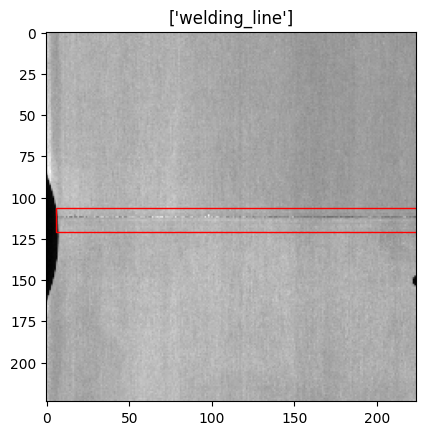

In [56]:
# Display a sample training image with its label
# Takes one batch from the train_dataset (which yields batches of images and labels).
for img, label in train_dataset.take(1):
    # show the first image in the batch. Convert the float pixel values in to PIL image that can be plotted
    plt.imshow(keras.preprocessing.image.array_to_img(img[0]))
    # Unpacks the label into its components (xmin tensor, ymin tensor, xmax tensor, ymax tensor, class one hot tensor
    out1, out2, out3, out4, out5 = label
    # Each outX is a batch of images so grap the first image and de-normalize the value from [0,1] back to [0,224]
    xmin, ymin, xmax, ymax = out1[0].numpy()*224, out2[0].numpy()*224, out3[0].numpy()*224, out4[0].numpy()*224
    # Creates a red rectangle object (bounding box) using matplotlib's Rectangle. 
    # The box is positioned at (xmin, ymin) with width/height derived from the bounding box coordinates.
    rect = Rectangle((xmin,ymin),(xmax - xmin),(ymax - ymin), fill = False, color = "r")
    # Gets the current axes object from matplotlib — needed to add custom shapes like rectangles.
    ax = plt.gca()
    # Adds the bounding box rectangle to the current image plot.
    ax.axes.add_patch(rect)
    # Creates a list to hold the predicted class label string for the image (though you're only adding one item here).
    pred_imglist = []
    # np.argmax(out5[0]) finds the index of the 1 in the one-hot vector (e.g., 2 if the class is 3).
    # +1 assumes your class labels start at 1 rather than 0.
    # class_dict[...] maps that numeric class ID to a human-readable string like "dent" or "scratch".
    pred_imglist.append(class_dict[np.argmax(out5[0])+1])
    plt.title(pred_imglist)
    plt.show()

In [57]:
# Import VGG16 model with pre-trained weights from ImageNet
# loads the VGG16 neural network, pre-trained on the ImageNet dataset, without its final classification layer (top), 
# and sets it up to accept images of shape 224×224 with 3 color channels (RGB).
# pooling='avg'. This turns the final convolutional feature maps into a single feature vector by averaging across the spatial dimensions.
# Output is a flat vector instead of a 3D feature map — which makes it easier to connect to a custom classification head later.
# This way, you can train your own classifier on top of VGG16’s powerful features, even with a smaller dataset.
#
# Summary: This code loads a pre-trained VGG16 model without the final classification layer, ready to be used as a feature extractor 
# for your own image classification or object detection task.
#base_vgg16 = tf.keras.applications.VGG16(weights = "imagenet", include_top = False, input_shape = (224,224,3), pooling = 'avg')

# Big Picture: What is this model doing?
# Imagine a robot with eyes (VGG16). You show it an image (e.g., of a metal part), and it:
# Figures out where a defect is — like drawing a red box around it (xmin, ymin, xmax, ymax)
# Decides what kind of defect it is — like saying “scratch” or “dent” (classification)
# So this model is doing two tasks at once:
# Object localization (bounding box regression)
# Object classification (what kind of thing is in the box)
# It's like a 3-part assembly line:
# [Image] → [Feature Extractor] → [Two Output Heads: Bounding Box + Class]

base_vgg16 = tf.keras.applications.VGG16(weights = 'data/misc/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5', include_top = False, input_shape = (224,224,3), pooling = 'avg')

In [58]:
# The robot is trainiable
base_vgg16.trainable = True

In [59]:
# Dear robot, expect each input to look like an image that’s 224x224 pixels with 3 color channels (RGB).
# (height, width, channels) = (224, 224, 3)
inputs = keras.Input(shape = (224,224,3))

In [60]:
# This will be a 1D feature vector — a kind of "summary" of what the model sees in the image.
# Robot, When a real image of shape (224, 224, 3) comes in, this is how it should flow through VGG16 to produce a 512-dimensional output.
# We're building a flowchart here (a graph of how data should move) not doing any real compution yet.
x = base_vgg16(inputs)
x.shape

(None, 512)

In [61]:
# Head #1: 
# Bounding Box (Where is the object?)
# Think of this as a machine that processes features into spatial understanding. 
# It transforms abstract visual features into more concrete location information.
x1 = keras.layers.Dense(1024, activation = "relu")(x)
x1 = keras.layers.Dense(512, activation = "relu")(x1)

In [62]:
# The machine outputs four floating-point numbers, one for each corner of the bounding box — as if drawing a box around a defect.
# Where is the defect
out1 = keras.layers.Dense(1, name = "xmin")(x1)
out2 = keras.layers.Dense(1, name = "ymin")(x1)
out3 = keras.layers.Dense(1, name = "xmax")(x1)
out4 = keras.layers.Dense(1, name = "ymax")(x1)

In [63]:
# Head #2: 
# Classification (What is the defect?)
# This second machine takes the same visual input but tries to decide what it's looking at. 
# The Dropout is like forcing the model to generalize by hiding parts of what it sees — to avoid overconfidence.
x2 = keras.layers.Dense(1024,activation = "relu")(x)
x2 = keras.layers.Dropout(0.5)(x2)
x2 = keras.layers.Dense(512,activation = "relu")(x2)
# This gives you a probability distribution over 10 classes — like saying: “There’s a 70% chance it’s a scratch, 20% it’s a dent, 10% inclusion.”
out_class = keras.layers.Dense(10,activation = "softmax", name = "class")(x2)

In [64]:
# Combine both outputs:
# You’re producing 5 outputs: 4 numbers for the bounding box 1 vector (length 10) for the class prediction
out = [out1, out2, out3, out4, out_class]

In [65]:
# This creates the full model and shows a summary of layers, shapes, and parameters.
vgg16 = keras.models.Model(inputs = inputs, outputs = out)
vgg16.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)    │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ vgg16 (Functional)            │ (None, 512)               │      14,714,688 │ input_layer_1[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_2 (Dense)               │ (None, 1024)              │         525,312 │ vgg16[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense (Dense)                 │ (None, 1024)              │         525,312 │ vgg16[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout (Dropout)             │ (None, 1024)              │               0 │ dense_2[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_1 (Dense)               │ (None, 512)               │         524,800 │ dense[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_3 (Dense)               │ (None, 512)               │         524,800 │ dropout[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ xmin (Dense)                  │ (None, 1)                 │             513 │ dense_1[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ ymin (Dense)                  │ (None, 1)                 │             513 │ dense_1[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ xmax (Dense)                  │ (None, 1)                 │             513 │ dense_1[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ ymax (Dense)                  │ (None, 1)                 │             513 │ dense_1[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ class (Dense)                 │ (None, 10)                │           5,130 │ dense_3[0][0]              │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 16,822,094 (64.17 MB)

 Trainable params: 16,822,094 (64.17 MB)

 Non-trainable params: 0 (0.00 B)